<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis testing
>* Null hypothesis - H0 = no difference vs. Ha = any significant difference. 
>* The question can be answered by formulation & simulation.
>* Premutation -   Two samples are mixed by a random reordering of entries in an array. Then what?  


In [69]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np

import pandas as pd

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/sheffield_weather_station.csv'
rainfall = np.loadtxt(fname=file_path, skiprows=9, usecols=(1,5)) #delimiter default is whitespace
#print(rainfall)

file_path = r'/content/drive/MyDrive/datasets/frog_tongue.csv'
print(file_path)
df = pd.read_csv(file_path, skiprows=14)
print(df.columns)
cols = ['ID', 'impact force (mN)']
print(df[cols])

# Obtain force data from each frog species
force_a = df[df['ID'] == 'I']['impact force (mN)']
force_b = df[df['ID'] == 'II']['impact force (mN)']
force_c = df[df['ID'] == 'III']['impact force (mN)']
force_d = df[df['ID'] == 'IV']['impact force (mN)']
print(len(force_a), len(force_b), len(force_c), len(force_d))
print(sorted(force_a), sorted(force_b), sorted(force_c), sorted(force_d))
print(np.mean(force_a), np.mean(force_b), np.mean(force_c), np.mean(force_d))

/content/drive/MyDrive/datasets/frog_tongue.csv
Index(['date', 'ID', 'trial number', 'impact force (mN)', 'impact time (ms)',
       'impact force / body weight', 'adhesive force (mN)',
       'time frog pulls on target (ms)', 'adhesive force / body weight',
       'adhesive impulse (N-s)', 'total contact area (mm2)',
       'contact area without mucus (mm2)',
       'contact area with mucus / contact area without mucus',
       'contact pressure (Pa)', 'adhesive strength (Pa)'],
      dtype='object')
    ID  impact force (mN)
0    I               1205
1    I               2527
2    I               1745
3    I               1556
4    I                493
..  ..                ...
75  IV                402
76  IV                605
77  IV                711
78  IV                614
79  IV                468

[80 rows x 2 columns]
20 20 20 20
[473, 493, 556, 775, 1205, 1240, 1282, 1307, 1543, 1545, 1556, 1692, 1745, 1891, 1897, 1928, 2032, 2276, 2527, 2641] [245, 269, 297, 327, 383, 435

In [70]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [71]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

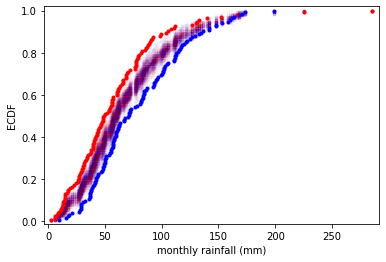

In [72]:
# Slice the weather data to get june data and november data 
rain_june = rainfall[rainfall[:, 0]==6][:,1]
rain_november = rainfall[rainfall[:, 0]==11][:,1]

#print(rain_june)

for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

#Test statistics
>* Overlaying the theoretical CDF with empirical ECDF and visual assessment can be ok for visual assessment
>* When performing hypothesis tests, your choice of test statistic should be be pertinent to the question you are seeking to answer in your hypothesis test.
>* p-value is the prob. of obtaining a value of your test statistic that is equally or more extreme than the one you observed, given that the null hypothesis is true.

In [73]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


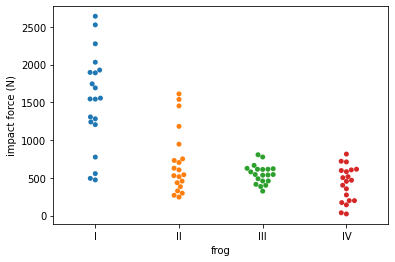

In [74]:
# Make bee swarm plot
_ = sns.swarmplot(df['ID'], df['impact force (mN)'])

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [75]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value is : %6.8f' %p)

p-value is : 0.00000000


#A one-sample bootstrap hypothesis test
>* We want to see if Frog D and Frog C have similar impact forces.
>* Suppose we only know the mean of Frog C's impact forces, 551 mN
>* Since you do not have the distribution of Frog C's data, you cannot do a permutation test:you cannot test the two coming from the same distribution.
>* This we test a less restrictive hypothesis: The mean foce of Frog D is equal to that of Frog C.

In [76]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
    
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [77]:
# Make an array of translated impact forces: translated_force_b such that its mean is 550.1 mN same as Frog C
translated_force_d = force_d - np.mean(force_d) + 550.1

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_d, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_d)) / 10000

# Print the p-value
print('p = %.6f' %p)


p = 0.005100


#A two-sample bootstrap hypothesis test
>* To test the hypothesis that Frog C and Frog D have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.
>* Shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal.
>* Draw bootstrap samples out of the shifted arrays and compute the difference in means. 
>* The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [80]:
forces_concat = np.concatenate((force_c, force_d))
empirical_diff_means = diff_of_means(force_c, force_d)

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_c_shifted = force_c - np.mean(force_c) + mean_force
force_d_shifted = force_d - np.mean(force_d) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_c = draw_bs_reps(force_c_shifted, np.mean, 10000)
bs_replicates_d = draw_bs_reps(force_d_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_c - bs_replicates_d

# Compute and print p-value: p
p = np.sum(bs_replicates > (np.mean(force_c - force_d))) / len(bs_replicates)
print('p-value = %.8f' %p)

p-value = 0.00000000
